In [1]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

In [3]:
trainset = datasets.MNIST(root="./data",download=True,train=True,transform=transform)
testset = datasets.MNIST(root="./data",download=True,train=False,transform=transform)

In [4]:
trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

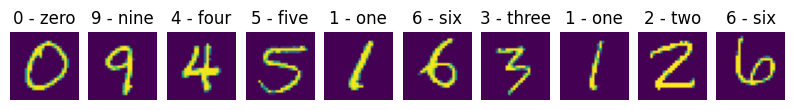

In [5]:
def show_image(dataset,num_images =10):
  def show_image(dataset, num_images=10):
    """
    Displays a grid of images from the given dataset.
    Args:
      dataset (torch.utils.data.Dataset): The dataset from which to load the images.
      num_images (int, optional): The number of images to display. Default is 10.
    Returns:
      None
    The function creates a DataLoader for the given dataset, retrieves a batch of images and labels,
    and displays them in a grid using matplotlib. The images are displayed with their corresponding
    labels as titles.
    """
  dataloader = DataLoader(dataset,batch_size=10,shuffle=True)
  images,labels = next(iter(dataloader))
  print(images,labels)

  fig = plt.figure(figsize=(10,10))
  no_of_columns = 5
  no_of_rows = num_images // no_of_columns # // is a floor division
  grid = ImageGrid(fig,  111, nrows_ncols=(1, 10), axes_pad=0.1, share_all=True)

  for i in range(num_images):
        grid[i].imshow(np.clip(images.numpy()[i].transpose(1,  2,  0),  0,  1))
        grid[i].axis('off')
        grid[i].set_title(dataset.classes[labels[i]])
      
  plt.show()

show_image(trainset)

In [6]:
from torchvision.utils import make_grid

def show_batch(dl):
    """
    Displays a batch of images from a DataLoader.

    Args:
        dl (DataLoader): A PyTorch DataLoader containing batches of images and labels.

    Returns:
        None
    """
    for images,labels in dl:
        fig,ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [42]:
batch_size = 256
train_dataloader = DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = 2)
val_dataloader = DataLoader(testset, batch_size = batch_size, shuffle = True, num_workers = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


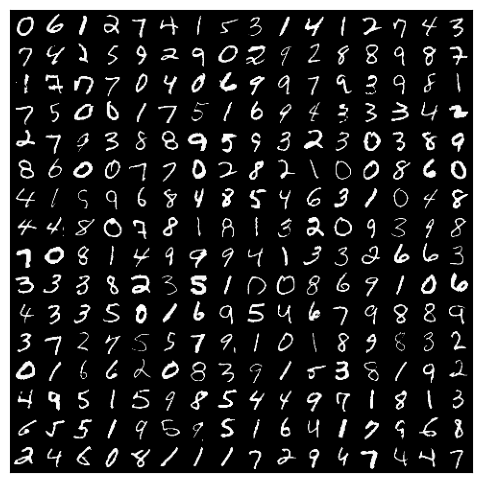

In [43]:
show_batch(train_dataloader)

In [44]:
img,label = trainset[0]
img.shape,label

(torch.Size([1, 28, 28]), 5)

In [45]:
import torch.nn as nn
"""
This script is part of the digit recognition lesson in the PyTorch for Deep Learning course.
Modules:
    torch.nn: A subpackage of PyTorch that provides neural network components.
    torch.nn.functional: A subpackage of PyTorch that provides functions for building neural networks.
"""
import torch.nn.functional as F

In [46]:
class DigitRecognition(nn.Module):
    """
    A Convolutional Neural Network (CNN) model for digit recognition.

    This model consists of three convolutional layers followed by a fully connected layer.
    It uses ReLU activations and max pooling for downsampling.

    Attributes:
        layer1 (nn.Sequential): The first convolutional layer.
        layer2 (nn.Sequential): The second convolutional layer with ReLU activation and max pooling.
        layer3 (nn.Sequential): The third convolutional layer with ReLU activation.
        out1 (nn.Linear): The fully connected layer that outputs the final class scores.

    Methods:
        forward(x):
            Performs a forward pass through the network.
            Args:
                x (torch.Tensor): The input tensor.
            Returns:
                output (torch.Tensor): The output tensor with class scores.
                x (torch.Tensor): The flattened tensor after the last convolutional layer.
                features (list): A list of feature maps from each layer.
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=8,kernel_size=(8,8),padding=1,stride=1)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=8,out_channels=32,kernel_size=(8,8),stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(8,8),stride=1,padding=1),
            nn.ReLU()
        )

        self.out1 = nn.Linear(128*8,10)

    def forward(self,x):
        features = []
        x = self.layer1(x)
        features.append(x)
        x = self.layer2(x)
        features.append(x)
        x = self.layer3(x)
        features.append(x)
        x = x.view(x.size(0),-1)
        features.append(x)
        output = self.out1(x)
        return output,x,features
        
model = DigitRecognition()
print(model)

DigitRecognition(
  (layer1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(8, 8), stride=(1, 1), padding=(1, 1))
  )
  (layer2): Sequential(
    (0): Conv2d(8, 32, kernel_size=(8, 8), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(8, 8), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (out1): Linear(in_features=1024, out_features=10, bias=True)
)


In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [48]:
def train(dataloader, model, loss_fn, optimizer):
    """
    Train the model for one epoch using the provided dataloader, loss function, and optimizer.
    Args:
        dataloader (torch.utils.data.DataLoader): DataLoader for the training data.
        model (torch.nn.Module): The neural network model to be trained.
        loss_fn (torch.nn.Module): The loss function to be used for training.
        optimizer (torch.optim.Optimizer): The optimizer to be used for updating the model parameters.
    Returns:
        torch.Tensor: The feature tensor from the last batch processed.
    """
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        pred, intermediate, feature = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 ==0:
            loss, current = loss.item(), (batch+1) *len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
        return feature

In [49]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss , correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            pred, val, feature = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return feature

In [50]:
train(train_dataloader,model,loss_fn,optimizer)

loss: 2.304495  [  256/60000]


[tensor([[[[-0.2175, -0.0226, -0.0653,  ..., -0.0401, -0.0526,  0.0560],
           [-0.2036,  0.1553, -0.0559,  ...,  0.0600,  0.0418,  0.2510],
           [-0.1387,  0.0890, -0.1340,  ...,  0.0521,  0.0418,  0.2510],
           ...,
           [-0.2458,  0.0418,  0.0418,  ...,  0.0418,  0.0418,  0.2510],
           [-0.2458,  0.0418,  0.0418,  ...,  0.0418,  0.0418,  0.2510],
           [-0.2944,  0.0493,  0.0493,  ...,  0.0493,  0.0493,  0.1716]],
 
          [[-0.3688, -0.2619, -0.2227,  ..., -0.2518, -0.2424, -0.3646],
           [-0.2849, -0.1003,  0.0334,  ..., -0.0312, -0.0257, -0.1506],
           [-0.3511, -0.1437, -0.0754,  ..., -0.0378, -0.0257, -0.1506],
           ...,
           [-0.2575, -0.0257, -0.0257,  ..., -0.0257, -0.0257, -0.1506],
           [-0.2575, -0.0257, -0.0257,  ..., -0.0257, -0.0257, -0.1506],
           [-0.1063,  0.0831,  0.0831,  ...,  0.0831,  0.0831,  0.0147]],
 
          [[-0.1544, -0.3102, -0.3330,  ..., -0.2756, -0.2899, -0.1926],
           [-

In [51]:
test(val_dataloader,model,loss_fn)

Test Error: 
 Accuracy: 10.7%, Avg loss: 2.299166 



[tensor([[[[-0.2179, -0.0532, -0.0532,  ...,  0.1801, -0.0219,  0.0556],
           [-0.2461,  0.0413,  0.0413,  ...,  0.0582,  0.0454,  0.2507],
           [-0.2461,  0.0413,  0.0413,  ...,  0.0097,  0.0337,  0.2507],
           ...,
           [-0.2461,  0.0701,  0.3527,  ...,  0.0413,  0.0413,  0.2507],
           [-0.2461,  0.0394,  0.1421,  ...,  0.0413,  0.0413,  0.2507],
           [-0.2944,  0.0538,  0.1038,  ...,  0.0492,  0.0492,  0.1716]],
 
          [[-0.3683, -0.2417, -0.2417,  ..., -0.2330, -0.2435, -0.3637],
           [-0.2568, -0.0248, -0.0248,  ..., -0.2458, -0.0558, -0.1494],
           [-0.2568, -0.0248, -0.0248,  ..., -0.3129, -0.0645, -0.1494],
           ...,
           [-0.2568, -0.0398, -0.1254,  ..., -0.0248, -0.0248, -0.1494],
           [-0.2568, -0.0163,  0.0490,  ..., -0.0248, -0.0248, -0.1494],
           [-0.1056,  0.0778,  0.0369,  ...,  0.0840,  0.0840,  0.0158]],
 
          [[-0.1536, -0.2887, -0.2887,  ..., -0.2167, -0.2732, -0.1915],
           [-